In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [58]:
#%% Leer csv paises
df_pasajeros = pd.read_csv('Titanic.csv', sep = ',')
df_pasajeros.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
unique_cabins = df_pasajeros['Cabin'].unique()

print(unique_cabins)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [60]:
df_pasajeros['Cabin'] = df_pasajeros['Cabin'].replace('nan', pd.NA)
df_pasajeros['Cabin_Letter'] = df_pasajeros['Cabin'].str[0]

cabin_dummies = pd.get_dummies(df_pasajeros['Cabin_Letter'], prefix='Cabin')

df_pasajeros = pd.concat([df_pasajeros, cabin_dummies], axis=1)
df_pasajeros['Cabin_A'] = df_pasajeros['Cabin_A'].map({'False': 0, 'True': 1, pd.NA:0})

df_pasajeros['Cabin_B'] = df_pasajeros['Cabin_B'].map({'False': 0, 'True': 1, pd.NA:0})

df_pasajeros['Cabin_C'] = df_pasajeros['Cabin_C'].map({'False': 0, 'True': 1,pd.NA:0})

df_pasajeros['Cabin_D'] = df_pasajeros['Cabin_D'].map({'False': 0, 'True': 1,pd.NA:0})

df_pasajeros['Cabin_E'] = df_pasajeros['Cabin_E'].map({'False': 0, 'True': 1, pd.NA:0})

df_pasajeros['Cabin_F'] = df_pasajeros['Cabin_F'].map({'False': 0, 'True': 1, pd.NA:0})

df_pasajeros['Cabin_E'] = df_pasajeros['Cabin_G'].map({'False': 0, 'True': 1,pd.NA:0})

df_pasajeros['Cabin_T'] = df_pasajeros['Cabin_T'].map({'False': 0, 'True': 1,pd.NA:0})

In [61]:
# %% Graficar la matriz de correlacion de df_pasajeros sin columna 'name'
plt.figure(figsize = (10, 6))

df_pasajeros['Sex'] = df_pasajeros['Sex'].map({'male': 0, 'female': 1})

df_pasajeros.drop(columns = ['Name','PassengerId', 'Cabin', 'Cabin_Letter', 'Ticket', 'Embarked'], inplace = True)

<Figure size 1000x600 with 0 Axes>

In [62]:
df_pasajeros.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,0,22.0,1,0,7.2500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,1,1,1,38.0,1,0,71.2833,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1,3,1,26.0,0,0,7.9250,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,1,1,1,35.0,1,0,53.1000,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,0,3,0,35.0,0,0,8.0500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


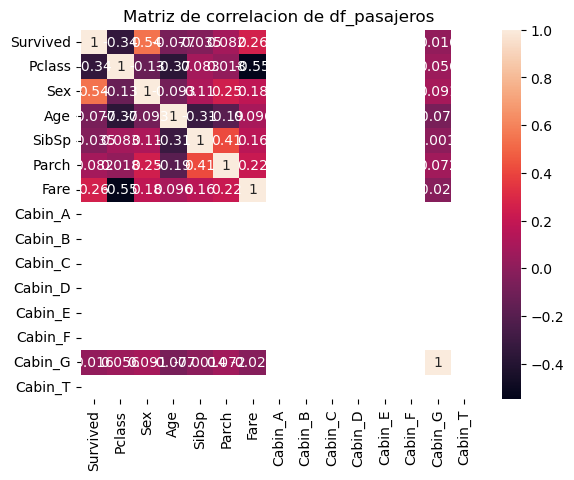

In [56]:
sns.heatmap(df_pasajeros.corr(), annot = True)
plt.title('Matriz de correlacion de df_pasajeros')
plt.show()

In [21]:


# Realizar analisis de componentes principales
#%% Elegir solo las variables numericas
df_paises_num = df_paises.select_dtypes(include = ['float64', 'int64'])

#%% Normalizar los datos
scaler = StandardScaler()
df_paises_norm = scaler.fit_transform(df_paises_num)

#%% Crear objeto PCA
pca = PCA(n_components = 9)

#%% Ajustar y transformar los datos
pca_paises = pca.fit_transform(df_paises_norm)

#%% Crear dataframe con los datos transformados
df_pca_paises = pd.DataFrame(data = pca_paises, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

#%% Realizar biplot mostrando los componentes principales y las variables originales
def biplot(etiquetas, columnas, df_pca, pca, componente_x, componente_y, title = 'Biplot', incluir_nombres = False):
    plt.figure(figsize = (10, 6))
    pcx_txt = f'PC{componente_x}'
    pcy_txt = f'PC{componente_y}'
    plt.scatter(df_pca[pcx_txt], df_pca[pcy_txt], alpha = 0.5)
    plt.title(title)
    plt.xlabel(f'{pcx_txt} {round(pca.explained_variance_ratio_[componente_x-1] * 100, 2)}%')
    plt.ylabel(f'{pcy_txt} {round(pca.explained_variance_ratio_[componente_y-1] * 100, 2)}%')
    for i, (pc1, pc2) in enumerate(zip(pca.components_[componente_x-1], pca.components_[componente_y-1])):
        # Aumentar tamaño de flechas
        pc1 *= 6
        pc2 *= 6
        plt.arrow(0, 0, pc1, pc2, head_width = 0.1, head_length = 0.1, linewidth = 2, color = 'red')
        plt.text(pc1, pc2, columnas[i+1], color = 'black', ha = 'right', va = 'bottom')
    # Mostrar el nombre en cada punto
    if incluir_nombres:
        for i, nombre in enumerate(etiquetas):
            plt.text(df_pca[pcx_txt][i], df_pca[pcy_txt][i], nombre, color = 'blue', ha = 'left', va = 'bottom')
    plt.grid()
    plt.show()

#%% Graficar biplot
biplot(df_paises['country'], df_paises.columns, df_pca_paises, pca, componente_x = 1, componente_y = 2, title = 'Biplot de Paises', incluir_nombres = False)

# %% Graficar la varianza explicada y acumulada en un único gráfico formado por dos subgráficos
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Varianza explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Varianza acumulada explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza acumulada')
plt.show()

# %% Graficar la matriz de correlacion de df_paises sin columna 'country'
plt.figure(figsize = (10, 6))
sns.heatmap(df_paises.drop(columns = 'country').corr(), annot = True)
plt.title('Matriz de correlacion de df_paises')
plt.show()

# %% Graficar la matriz de correlacion de los componentes principales
plt.figure(figsize = (10, 6))
sns.heatmap(df_pca_paises.corr(), annot = True)
plt.title('Matriz de correlacion de los componentes principales')
plt.show()

#%% Para cada columna imprimir el valor del componente principal correspondiente a PCx
def imprimir_componentes_principales(df, pca, componente_x):
    pcx_txt = f'PC{componente_x}'
    print(f'Componentes principales para {pcx_txt}')
    for i, columna in enumerate(df.columns):
        print(f'{columna}:'.ljust(15), f'{pca.components_[componente_x-1][i]:.2f}')
        
#%%
imprimir_componentes_principales(df_paises_num, pca, 2)
# %%


NameError: name 'df_paises' is not defined